In [8]:
import pandas as pd

def select_state_data(csv_file, state_name):
    """
    Reads a CSV file, filters rows for Massachusetts, 
    and returns a DataFrame containing only Massachusetts data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Filter rows based on the "state" column
        state_df = df[df["state"] == state_name]
        
        return state_df

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None  # Return None in case of an error
    except KeyError:
        print(f"Error: Column 'state' not found in '{csv_file}'.")
        return None

# Usage:
csv_file_path = "eaglei_outages_2023_raw.csv"  # Replace with your CSV file path
massachusetts_df = select_state_data(csv_file_path, "Massachusetts")

if massachusetts_df is not None:  # Check if filtering was successful
    # Get unique county names from the filtered DataFrame
    unique_counties_in_massachusetts = massachusetts_df["county"].unique()

    # Print the unique county names
    print("Unique Counties in Massachusetts:")
    for county in unique_counties_in_massachusetts:
        print(county)

Error: File 'eaglei_outages_2023_raw.csv' not found.


In [7]:
massachusetts_df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [30]:
# Filter for Suffolk County
suffolk_df = massachusetts_df[massachusetts_df["county"] == "Suffolk"]
suffolk_df.info()
suffolk_df.head()

# Save to CSV
#suffolk_df.to_csv("suffolk_outages.csv", index=False) 

#print("Data for Suffolk County has been saved to 'suffolk_outages.csv'")

<class 'pandas.core.frame.DataFrame'>
Index: 18296 entries, 42812 to 26082377
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fips_code       18296 non-null  int64 
 1   county          18296 non-null  object
 2   state           18296 non-null  object
 3   sum             18296 non-null  int64 
 4   run_start_time  18296 non-null  object
dtypes: int64(2), object(3)
memory usage: 857.6+ KB


,fips_code,county,state,sum,run_start_time
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00


C:\Users\jonas\AppData\Local\Temp\ipykernel_22000\2951012310.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])
C:\Users\jonas\AppData\Local\Temp\ipykernel_22000\2951012310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffolk_df['hour'] = suffolk_df['run_start_time'].dt.hour


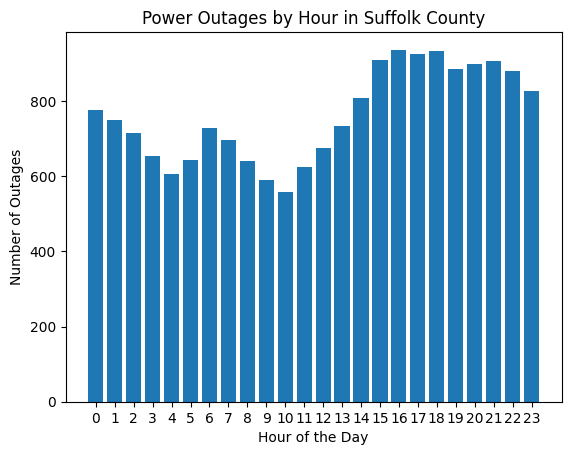

,fips_code,county,state,sum,run_start_time,hour
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,17
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,18
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,19
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00,19
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00,20


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'run_start_time' to datetime (assuming it's in a suitable string format)
suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])

# Extract the hour from the 'run_start_time'
suffolk_df['hour'] = suffolk_df['run_start_time'].dt.hour

# Count the number of outages per hour
outage_counts_by_hour = suffolk_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(outage_counts_by_hour.index, outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outages')
plt.title('Power Outages by Hour in Suffolk County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

suffolk_df.head()

C:\Users\jonas\AppData\Local\Temp\ipykernel_22000\2635978100.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['month'] = county_df['run_start_time'].dt.month


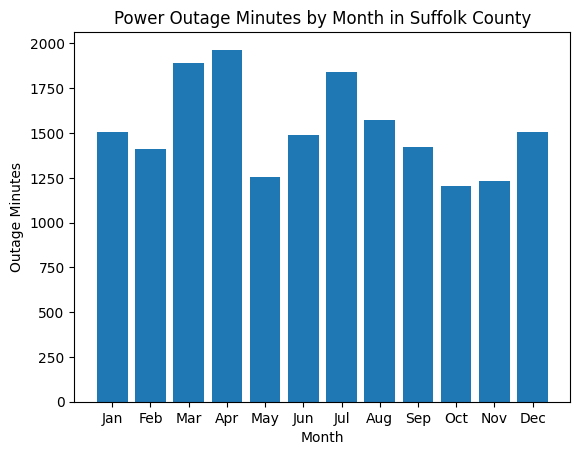

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outages_by_month(county_df):
    try:
        

        # Extract the month from the `run_start_time` column
        county_df['month'] = county_df['run_start_time'].dt.month

        # Count the number of outages per month and sort by month number
        outage_counts_by_month = county_df['month'].value_counts().sort_index()

        # Plot the histogram
        plt.bar(outage_counts_by_month.index, outage_counts_by_month.values)
        plt.xlabel('Month')
        plt.ylabel('Outage Minutes')
        plt.title('Power Outage Minutes by Month in Suffolk County')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found in '{csv_file_path}'.")


# Usage
plot_outages_by_month(suffolk_df)

In [1]:
# Sort by 'run_start_time' to ensure chronological order
suffolk_df = suffolk_df.sort_values('run_start_time')

# Calculate the time difference between consecutive rows in minutes
suffolk_df['time_diff'] = suffolk_df['run_start_time'].diff().dt.total_seconds() / 60

# Fill the first difference (which will be NaN) with 15 (assuming the first row is the start of an outage)
suffolk_df['time_diff'].fillna(15, inplace=True)

# Create an 'outage_id' column to group consecutive 15-minute intervals into outages
suffolk_df['outage_id'] = (suffolk_df['time_diff'] > 15).cumsum()  # Increment outage_id whenever time_diff is greater than 15

suffolk_df.head(80)

#try

NameError: name 'suffolk_df' is not defined

In [41]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy()  # Make a copy to avoid modifying the original DataFrame

suffolk_starting_df.head()

,fips_code,county,state,sum,run_start_time,hour,month,time_diff,outage_id
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,17,1,15.0,0
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,18,1,60.0,1
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,19,1,60.0,2
55045,25025,Suffolk,Massachusetts,1,2023-01-01 22:00:00,22,1,120.0,3
67885,25025,Suffolk,Massachusetts,1,2023-01-02 03:45:00,3,1,60.0,4


In [40]:
# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

outage_durations_df.head()

,outage_id,duration_intervals,duration_minutes
0,0,1,15
1,1,1,15
2,2,3,45
3,3,20,300
4,4,8,120


In [65]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy() 

# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

# Merge the two DataFrames on 'outage_id'
suffolk_starting_df = pd.merge(suffolk_starting_df, outage_durations_df, on='outage_id', how='left')
suffolk_starting_df.drop(columns=['time_diff'], inplace=True)

suffolk_starting_df.tail() 

,fips_code,county,state,sum,run_start_time,hour,month,outage_id,duration_intervals,duration_minutes
1278,25025,Suffolk,Massachusetts,1,2023-12-29 02:30:00,2,12,1278,6,90
1279,25025,Suffolk,Massachusetts,1,2023-12-29 13:45:00,13,12,1279,9,135
1280,25025,Suffolk,Massachusetts,1,2023-12-30 20:15:00,20,12,1280,8,120
1281,25025,Suffolk,Massachusetts,18,2023-12-31 04:15:00,4,12,1281,21,315
1282,25025,Suffolk,Massachusetts,15,2023-12-31 12:00:00,12,12,1282,13,195


In [69]:
# Count outages longer than 480 minutes
longer_than_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 60].shape[0]

# Count outages shorter than or equal to 480 minutes
shorter_than_or_equal_to_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 480].shape[0]

print("Number of outages longer than 60 minutes:", longer_than_480)
print("Number of outages longer than 480 minutes:", shorter_than_or_equal_to_480)

Number of outages longer than 60 minutes: 847
Number of outages longer than 480 minutes: 139


In [58]:
# Find the row with the maximum 'duration_minutes'
max_duration_row = suffolk_starting_df.loc[suffolk_starting_df['duration_minutes'].idxmax()]

# Extract the outage_id of the row with the maximum duration
max_outage_id = max_duration_row['outage_id']
print(max_duration_row)

fips_code                           25025
county                            Suffolk
state                       Massachusetts
sum                                    66
run_start_time        2023-03-25 15:00:00
hour                                   15
month                                   3
outage_id                             281
duration_intervals                    594
duration_minutes                     8910
Name: 281, dtype: object


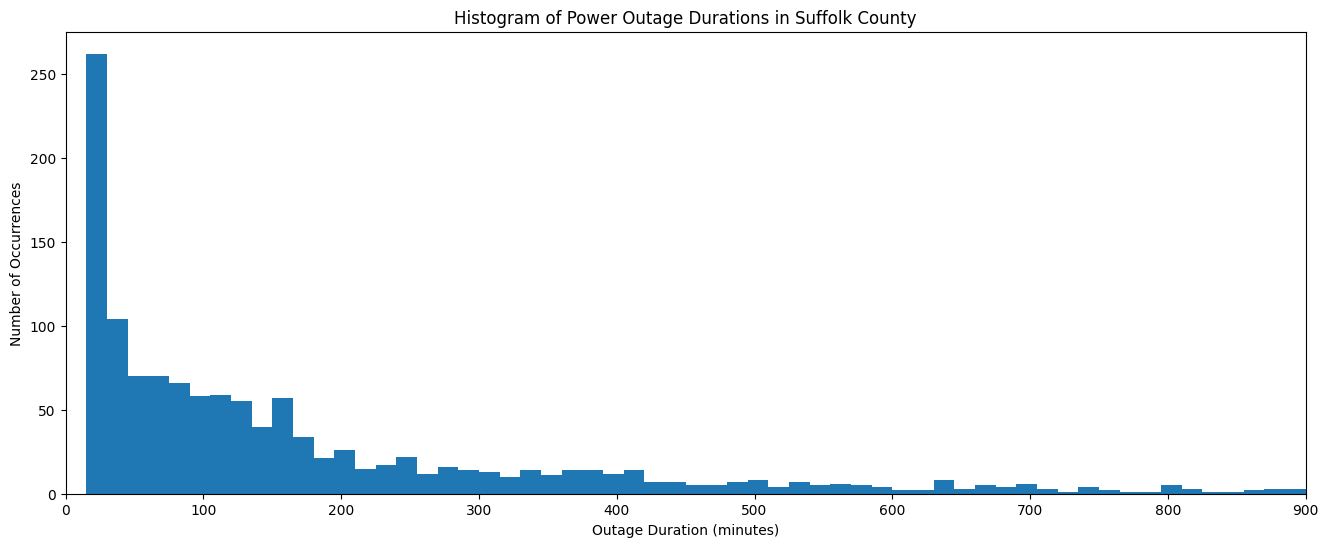

In [64]:
# Plot the histogram
plt.figure(figsize=(16, 6)) 
plt.xlim(0, 900)
plt.hist(suffolk_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Power Outage Durations in Suffolk County')
plt.show()

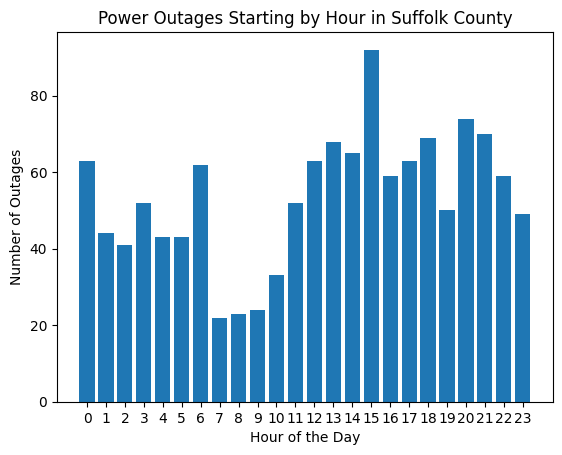

In [63]:
# Count the number of outages per hour
starting_outage_counts_by_hour = suffolk_starting_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(starting_outage_counts_by_hour.index, starting_outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outages')
plt.title('Power Outages Starting by Hour in Suffolk County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()